In [1]:
import tensorflow as tf 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from  tensorflow.keras import models, optimizers, regularizers

In [2]:
model = models.Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      18,940,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,034,177 (72.61 MB)

 Trainable params: 19,034,177 (72.61 MB)

 Non-trainable params: 0 (0.00 B)

In [3]:
# Clase 23

train_datagen = ImageDataGenerator(rescale= 1./255,
                            rotation_range = 40,
                            width_shift_range = 0.2,
                            height_shift_range = 0.2,
                            shear_range = 0.2,
                            zoom_range = 0.2,
                             horizontal_flip = True
                            )

In [4]:
test_datagen = ImageDataGenerator(rescale= 1./255)

In [5]:
train_generator = train_datagen.flow_from_directory('/kaggle/input/cnn-data-sources/cats_and_dogs/train',
                                 target_size=(150,150),
                                 batch_size=32,
                                 class_mode='binary')
validation_generator = test_datagen.flow_from_directory('/kaggle/input/cnn-data-sources/cats_and_dogs/validation',
                                 target_size=(150,150),
                                 batch_size=32,
                                 class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [6]:
checkpoint = ModelCheckpoint('modelo_perros_gatos.keras', 
                             verbose=1, 
                             monitor='val_accuracy', 
                             save_best_only=True)

In [7]:
model.compile(loss='binary_crossentropy', 
              optimizer=optimizers.Adam(), 
              metrics=['accuracy'])

In [8]:
hist = model.fit(train_generator, steps_per_epoch=2000//32, 
                 epochs=100, 
                 validation_data=validation_generator,
                 validation_steps=1000//32,
                 callbacks=[checkpoint]
                )

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/100


I0000 00:00:1748560468.969752      77 service.cc:148] XLA service 0x7bfd400039d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1748560468.971383      77 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1748560468.971404      77 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1748560469.437258      77 cuda_dnn.cc:529] Loaded cuDNN version 90300


 1/62 ━━━━━━━━━━━━━━━━━━━━ 8:33 8s/step - accuracy: 0.5000 - loss: 0.6987

I0000 00:00:1748560474.385455      77 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step - accuracy: 0.5091 - loss: 0.8566
Epoch 1: val_accuracy improved from -inf to 0.56149, saving model to modelo_perros_gatos.keras
62/62 ━━━━━━━━━━━━━━━━━━━━ 53s 731ms/step - accuracy: 0.5089 - loss: 0.8547 - val_accuracy: 0.5615 - val_loss: 0.6930
Epoch 2/100
 1/62 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.3750 - loss: 0.6933

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()



Epoch 2: val_accuracy improved from 0.56149 to 0.56956, saving model to modelo_perros_gatos.keras
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 69ms/step - accuracy: 0.3750 - loss: 0.6933 - val_accuracy: 0.5696 - val_loss: 0.6930
Epoch 3/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step - accuracy: 0.5132 - loss: 0.6944
Epoch 3: val_accuracy did not improve from 0.56956
62/62 ━━━━━━━━━━━━━━━━━━━━ 18s 287ms/step - accuracy: 0.5131 - loss: 0.6944 - val_accuracy: 0.4990 - val_loss: 0.7060
Epoch 4/100
 1/62 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.5312 - loss: 0.6880
Epoch 4: val_accuracy did not improve from 0.56956
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.5312 - loss: 0.6880 - val_accuracy: 0.4980 - val_loss: 0.7118
Epoch 5/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step - accuracy: 0.5097 - loss: 0.6965
Epoch 5: val_accuracy did not improve from 0.56956
62/62 ━━━━━━━━━━━━━━━━━━━━ 18s 282ms/step - accuracy: 0.5097 - loss: 0.6964 - val_accuracy: 0.5020 - val_loss: 0.6910
Epoch 6/100
 1/62 ━━

In [9]:
import matplotlib.pyplot as plt

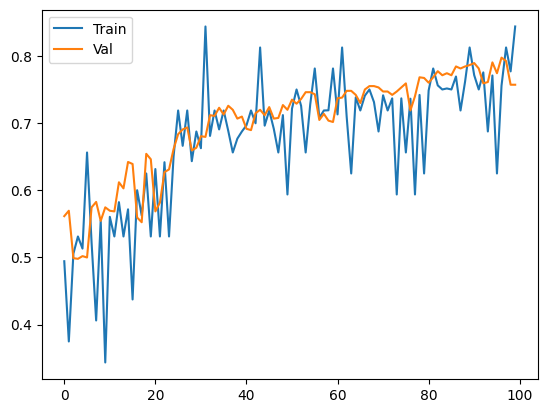

In [10]:
plt.plot(hist.history['accuracy'], label = 'Train')
plt.plot(hist.history['val_accuracy'], label = 'Val')
plt.legend()
plt.show()

In [11]:
test_generator = test_datagen.flow_from_directory('../input/cnn-data-sources/cats_and_dogs/test',
                                 target_size=(150,150),
                                 batch_size=32,
                                 class_mode='binary'
                                 )

Found 1000 images belonging to 2 classes.


In [12]:
model2 = model

In [13]:
model2.load_weights('./modelo_perros_gatos.keras')

In [14]:
model2.evaluate(test_generator)

32/32 ━━━━━━━━━━━━━━━━━━━━ 10s 319ms/step - accuracy: 0.7580 - loss: 0.5228


[0.5126519799232483, 0.7620000243186951]